# Behavioural analysis

## Preparing the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob

/Users/egor/Library/Enthought/Canopy_32bit/User/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Loading the data:

In [2]:
%matplotlib inline
plt.style.use('dark_background')
expName = 'mcEcc_ct-szXbv'
dataDir = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data/', expName))
allSubjDirs = glob.glob(dataDir + '/' + expName + '*')
#print allSubjDirs
ds = pd.DataFrame()
for subjDir in allSubjDirs:
    print subjDir
    subjFilePath = glob.glob(subjDir + '/' + expName + '*.csv')[0]
    #print subjFilePath
    #ss = pd.read_csv(subjFilePath)
    ds = ds.append(pd.read_csv(subjFilePath))
#print ds.head(5)
print ds.shape
print ds.columns

/Users/egor/Dropbox/Projects/mc/data/mcEcc_ct-szXbv/mcEcc_ct-szXbv_p0_s2_2016-11-21_1549
/Users/egor/Dropbox/Projects/mc/data/mcEcc_ct-szXbv/mcEcc_ct-szXbv_p0_s3_2016-11-21_1555
/Users/egor/Dropbox/Projects/mc/data/mcEcc_ct-szXbv/mcEcc_ct-szXbv_p1_s1_2016-11-25_1559
/Users/egor/Dropbox/Projects/mc/data/mcEcc_ct-szXbv/mcEcc_ct-szXbv_p1_s2_2016-11-25_1609
/Users/egor/Dropbox/Projects/mc/data/mcEcc_ct-szXbv/mcEcc_ct-szXbv_p2_s1_2016-12-02_1430
/Users/egor/Dropbox/Projects/mc/data/mcEcc_ct-szXbv/mcEcc_ct-szXbv_p2_s2_2016-12-02_1438
/Users/egor/Dropbox/Projects/mc/data/mcEcc_ct-szXbv/mcEcc_ct-szXbv_p3_s2_2016-11-21_1446
/Users/egor/Dropbox/Projects/mc/data/mcEcc_ct-szXbv/mcEcc_ct-szXbv_p3_s3_2016-11-21_1454
(768, 45)
Index([u'BsfL', u'BsfR', u'BvL', u'BvR', u'colorL', u'colorR', u'dirL',
       u'dirR', u'expName', u'fovFade', u'fovGap', u'nFrames', u'nNa',
       u'nf000', u'nf090', u'nf180', u'nf270', u'offX', u'offY',
       u'participant', u'pd000', u'pd090', u'pd180', u'pd270', u'periF

Transforming the data set first.

In [3]:
ds['stimSz'] = np.round((ds.periGap*2+32)/35,1)
ds['ringSzDeg'] = np.round((ds.ringSz+32)/35,1)
ds['ringSzP'] = np.round(ds.ringSzDeg/ds.stimSz,2)
ds = ds.reset_index(drop=True) # resetting the index as there are row duplicates
print ds.head(5)

   BsfL  BsfR   BvL   BvR     colorL     colorR  dirL  dirR         expName  \
0  0.05  0.05  9.60  0.01  [0, 0, 0]  [0, 0, 0]     0     0  mcEcc_ct-szXbv   
1  0.05  0.05  0.01  9.60  [0, 0, 0]  [0, 0, 0]     0     0  mcEcc_ct-szXbv   
2  0.05  0.05  9.60  0.01  [0, 0, 0]  [0, 0, 0]     0     0  mcEcc_ct-szXbv   
3  0.05  0.05  0.01  9.60  [0, 0, 0]  [0, 0, 0]     0     0  mcEcc_ct-szXbv   
4  0.05  0.05  0.01  9.60  [0, 0, 0]  [0, 0, 0]     0     0  mcEcc_ct-szXbv   

   fovFade   ...     tfL  tfR             time  trialN  trialT  vL  vR  \
0        2   ...     NaN  NaN  2016-11-21_1549       1       1   0   0   
1        2   ...     NaN  NaN  2016-11-21_1549       2       1   0   0   
2        2   ...     NaN  NaN  2016-11-21_1549       3       1   0   0   
3        2   ...     NaN  NaN  2016-11-21_1549       4       1   0   0   
4        2   ...     NaN  NaN  2016-11-21_1549       5       1   0   0   

   stimSz  ringSzDeg  ringSzP  
0     5.7        3.3     0.58  
1     4.3       

## Visualization

In [4]:
summary = ds.groupby(['participant'], as_index=False)['nf270'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
print 'Slow (down):'
print summary
summary = ds.groupby(['participant'], as_index=False)['nf180'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
print 'Fast (left):'
print summary
summary = ds.groupby(['participant'], as_index=False)['nf090'].agg([np.sum, np.mean, np.std, np.size]).reset_index()
print 'Patchy/transparent (up):'
print summary

Slow (down):
   participant  sum      mean       std  size
0            0  112  0.583333  0.494296   192
1            1  114  0.593750  0.492416   192
2            2   56  0.291667  0.455718   192
3            3   68  0.354167  0.479510   192
Fast (left):
   participant  sum      mean       std  size
0            0    9  0.046875  0.211924   192
1            1    0  0.000000  0.000000   192
2            2    0  0.000000  0.000000   192
3            3    3  0.015625  0.124344   192
Patchy/transparent (up):
   participant  sum      mean       std  size
0            0   71  0.369792  0.484010   192
1            1   78  0.406250  0.492416   192
2            2  136  0.708333  0.455718   192
3            3  121  0.630208  0.484010   192


In [5]:
ssRing = ds[ds.ringSzP < 1]

### Proportion slow/fast/patchy trials

(-0.1, 1.1)

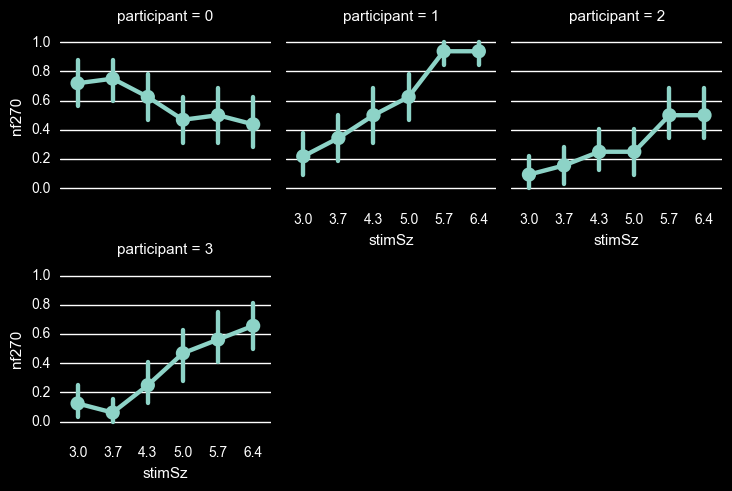

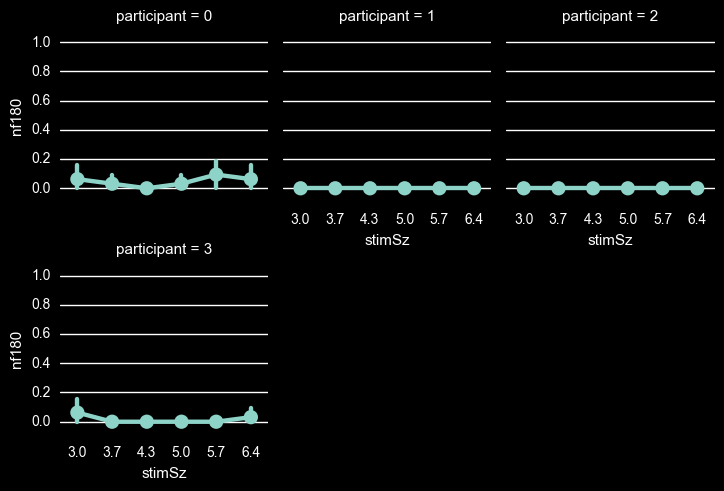

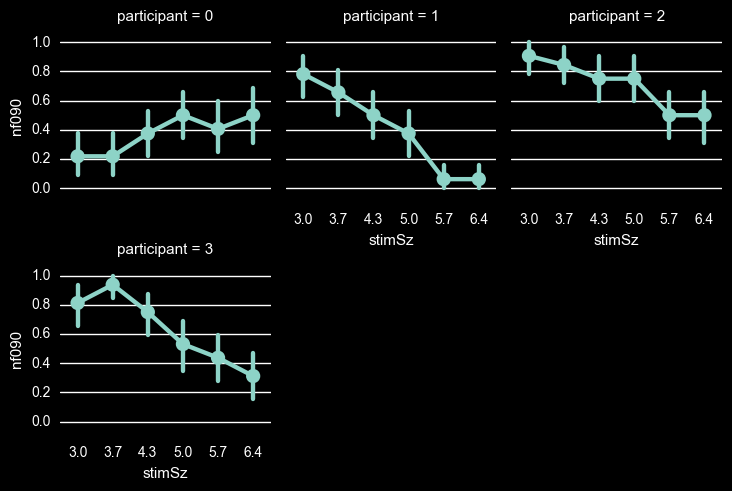

In [6]:
g = sns.factorplot(x='stimSz', y='nf270', col='participant', col_wrap=3,
                   data=ds, ci=95, dodge=.0, size=2.5)
plt.ylim(-0.1,1.1)
g = sns.factorplot(x='stimSz', y='nf180', col='participant', col_wrap=3,
                   data=ds, ci=95, dodge=.0, size=2.5)
plt.ylim(-0.1,1.1)
g = sns.factorplot(x='stimSz', y='nf090', col='participant', col_wrap=3,
                   data=ds, ci=95, dodge=.0, size=2.5)
plt.ylim(-0.1,1.1)

### Stimulus size for slow/fast/patchy trials

(-0.1, 1.1)

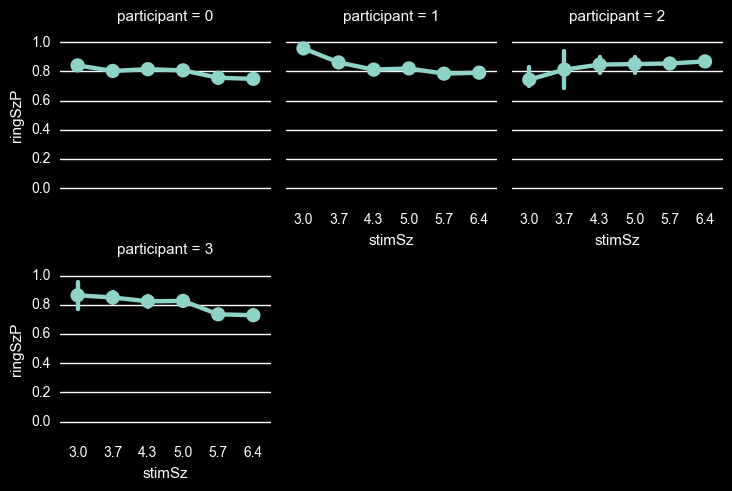

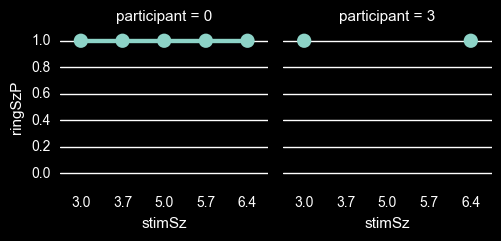

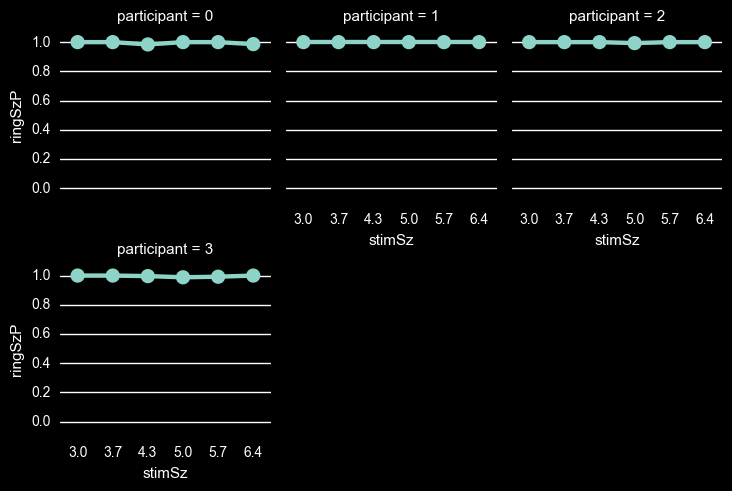

In [7]:
g = sns.factorplot(x='stimSz', y='ringSzP', col='participant', col_wrap=3,
                   data=ds[ds.nf270==1], ci=95, dodge=.0, size=2.5)
plt.ylim(-0.1,1.1)
g = sns.factorplot(x='stimSz', y='ringSzP', col='participant', col_wrap=3,
                   data=ds[ds.nf180==1], ci=95, dodge=.0, size=2.5)
plt.ylim(-0.1,1.1)
g = sns.factorplot(x='stimSz', y='ringSzP', col='participant', col_wrap=3,
                   data=ds[ds.nf090==1], ci=95, dodge=.0, size=2.5)
plt.ylim(-0.1,1.1)